In [ ]:
import pandas as pd
import torch
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import zipfile

with zipfile.ZipFile("C:/Users/slima/NLP/NLP_projct_1/data/dataset_small.zip", "r") as zip_ref:
    zip_ref.extractall("C:/Users/slima/NLP/NLP_projct_1/data/data_folder")  # You can name this anything

In [ ]:
# import pandas as pd
# df = pd.read_csv("dataset_small.csv.zip.zip")
# df.head()

In [ ]:
# df.info()


## 1\ loading the dataset

In [ ]:
import pandas as pd
df = pd.read_csv("data_folder/structured_cleaned_new_dataset.csv")
df.head()

,id,file_path,file_size,line_count,extension,language,code,clean_code,clean_line_count,clean_size
0,1,Markdown/000001.md,34784,572,md,Markdown,# Contributing\n\n| Component | Bui...,contributing\n\n component build ...,186,10000
1,2,XML/000002.props,3013,44,props,XML,"﻿<Project ToolsVersion=""15.0"" xmlns=""http://sc...",project toolsversion xmlns\n propertygroup\n ...,44,1812
2,3,Text/000003.txt,1076,21,txt,Text,The MIT License (MIT)\n\nCopyright (c) 2015 Mi...,the mit license mit\n\ncopyright c 2015 micros...,21,1026
3,4,Markdown/000004.md,8105,84,md,Markdown,# Azure SDK for .NET\n\n[![Packages](https://i...,azure sdk for net\n\npackageshttpsimgshieldsi...,84,7244
4,5,Markdown/000005.md,2763,41,md,Markdown,<!-- BEGIN MICROSOFT SECURITY.MD V0.0.5 BLOCK ...,begin microsoft securitymd v005 block \n\n se...,41,2523


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86227 entries, 0 to 86226
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                86227 non-null  int64 
 1   file_path         86227 non-null  object
 2   file_size         86227 non-null  int64 
 3   line_count        86227 non-null  int64 
 4   extension         86227 non-null  object
 5   language          86227 non-null  object
 6   code              86171 non-null  object
 7   clean_code        86169 non-null  object
 8   clean_line_count  86227 non-null  int64 
 9   clean_size        86227 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 6.6+ MB


# 2 \ sanity checks (small checks in our dataframe and datatype of features)

In [ ]:
print("Rows:", len(df))
print("\nLanguage distribution:\n", df["language"].value_counts())

Rows: 86227

Language distribution:
 language
Dart           15345
Rust           14128
C#             10000
Go              9124
JSON            5570
               ...  
Emacs Lisp         2
AppleScript        1
SAS                1
Yacc               1
AsciiDoc           1
Name: count, Length: 77, dtype: int64


In [ ]:
print(df["clean_code"].dtype)


object


in When Pandas shows object as the dtype for your code column, it means the column is storing string values (in Pandas, text data is represented as object type). So your code snippets are indeed being treated as strings, which is the correct format for NLP tasks.


In [ ]:
df["code"] = df["code"].astype(str)
df["clean_code"] = df["clean_code"].astype(str)

here we change the datatype to string and also we will use the clean_code for transformer and maybe neurall networks and unstructured code for basic machine learning models

In [ ]:
def normalize_code(s: str) -> str:
    return " ".join(s.split())  # collapse whitespace, remove \n and \t

             # keep structure for transformers
df["unstructured_code"] = df["clean_code"].apply(normalize_code)  # for TF-IDF

here when i was splitting the data i had a problem when i wanted to use the stratify method that makes all the data equal in (train val and test ) for ex whithout the stratify we can get 80% of our python codes in the training and 20in val and maybe 1 or 2 codes in the test
# so we did put all the rare programing languages that have less then 5 codes in a class called other in the language features

In [ ]:
class_counts = df['language'].value_counts()
print(class_counts)

language
Dart           15345
Rust           14128
C#             10000
Go              9124
JSON            5570
               ...  
Emacs Lisp         2
AppleScript        1
SAS                1
Yacc               1
AsciiDoc           1
Name: count, Length: 77, dtype: int64


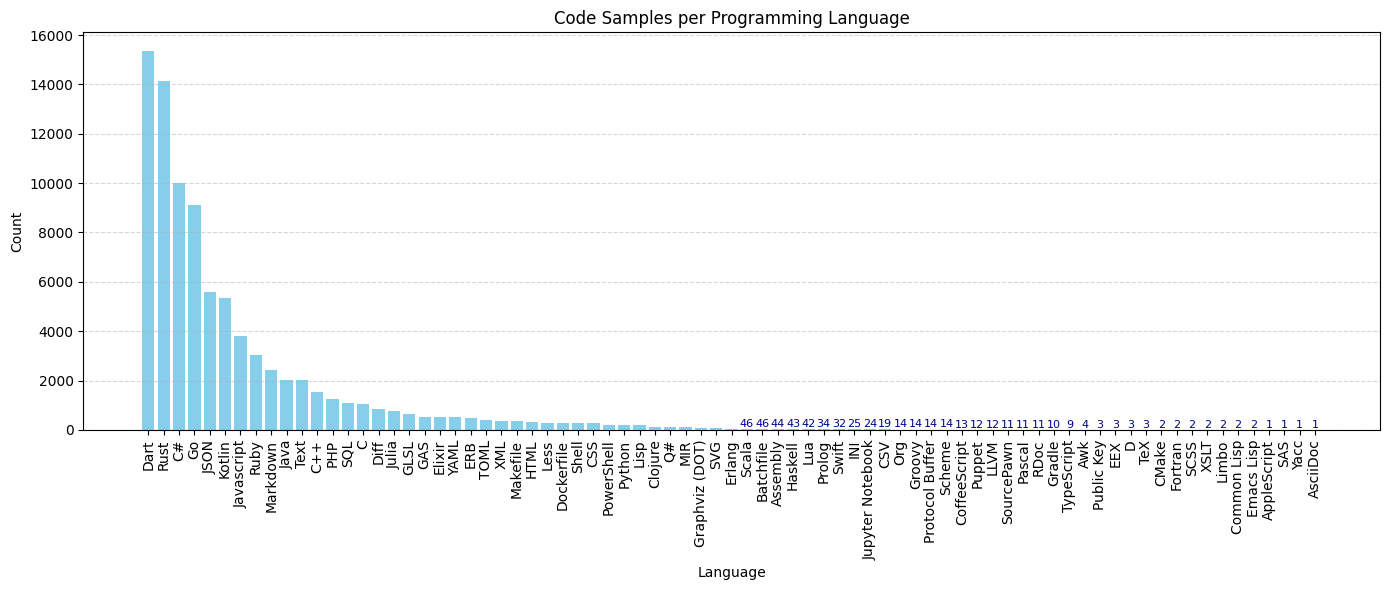

In [ ]:
import matplotlib.pyplot as plt

# Sort by count to make small values easier to spot
class_counts_sorted = class_counts.sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(class_counts_sorted.index, class_counts_sorted.values, color='skyblue')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add value labels on top of each bar (especially useful for small values)
for bar in bars:
    height = bar.get_height()
    if height < 50:  # Only label small values to reduce clutter
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=8, color='darkblue')

plt.title("Code Samples per Programming Language")
plt.ylabel("Count")
plt.xlabel("Language")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# from this visualization i think we can go with 50 trasholder min by class unless that it will be classed in a class called other

In [ ]:
min_count = 10  # threshold
counts = df["language"].value_counts()

df["language"] = df["language"].apply(
    lambda x: x if counts[x] >= min_count else "Other"
)

print(df["language"].value_counts())

language
Dart              15345
Rust              14128
C#                10000
Go                 9124
JSON               5570
Kotlin             5341
Javascript         3823
Ruby               3033
Markdown           2414
Java               2035
Text               2032
C++                1534
PHP                1232
SQL                1084
C                  1029
Diff                832
Julia               763
GLSL                642
GAS                 536
Other               534
Elixir              529
YAML                520
ERB                 496
TOML                413
XML                 358
Makefile            355
HTML                338
Less                274
Dockerfile          270
Shell               267
CSS                 259
PowerShell          198
Python              183
Lisp                182
Clojure             126
Q#                  115
MIR                 109
Graphviz (DOT)       85
SVG                  69
Erlang               50
Name: count, dtype: int64


In [ ]:
other_count = (df["language"] == "Other").sum()
print("Number of code snippets in the otherclass:", other_count)


Number of code snippets in the otherclass: 534


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86227 entries, 0 to 86226
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 86227 non-null  int64 
 1   file_path          86227 non-null  object
 2   file_size          86227 non-null  int64 
 3   line_count         86227 non-null  int64 
 4   extension          86227 non-null  object
 5   language           86227 non-null  object
 6   code               86227 non-null  object
 7   clean_code         86227 non-null  object
 8   clean_line_count   86227 non-null  int64 
 9   clean_size         86227 non-null  int64 
 10  unstructured_code  86227 non-null  object
dtypes: int64(5), object(6)
memory usage: 7.2+ MB


In [ ]:
print(df.isnull().sum())

# Check how many rows in total have any missing value
print("Rows with missing values:", df.isnull().any(axis=1).sum())


id                   0
file_path            0
file_size            0
line_count           0
extension            0
language             0
code                 0
clean_code           0
clean_line_count     0
clean_size           0
unstructured_code    0
dtype: int64
Rows with missing values: 0


In [ ]:
def total_code_samples(df, label_column='language'):
    return df[label_column].value_counts().sum()
total = total_code_samples(df)
print(f"Total code samples across all languages: {total}")


Total code samples across all languages: 86227


# 3 train validation test split

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = df["clean_code"].values   # normalized code for ML models
y = df["language"].values    # target labels

# Step 1: Split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,          # 30% goes to temp
    random_state=42,         # ensures reproducibility
    stratify=y               # keeps class proportions balanced
)

# Step 2: Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,          # half of 30% = 15%
    random_state=42,
    stratify=y_temp
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 60358
Validation size: 12934
Test size: 12935


# TF-IDF vectorization with char n garms

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Character n-grams are strong for language ID, capturing syntax and punctuation patterns
tfidf = TfidfVectorizer(
    analyzer="char",
    ngram_range=(3, 5),      # tri-grams to penta-grams
    min_df=2,                # ignore very rare n-grams
    lowercase=False,         # preserve case (useful for languages)
    max_features=200_000     # cap features to control memory
)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec   = tfidf.transform(X_val)
X_test_vec  = tfidf.transform(X_test)

print("Vectorized shapes:", X_train_vec.shape, X_val_vec.shape, X_test_vec.shape)

Vectorized shapes: (60358, 200000) (12934, 200000) (12935, 200000)


In [ ]:
type(X_train_vec)

scipy.sparse._csr.csr_matrix

- min_df = minimum document frequency.
so here mindf if the char token appear less than 1 time it wont be used  so our vocabulary will decress if we increass the min df

# the modele naive baise (multinomial & complement)

# 1\multinomial

finding the best alpha for the model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB

alphas = np.logspace(-3, 0, 6)  # [0.001, 0.01, 0.1, 0.316, 1.0]
best_alpha, best_f1 = None, -1.0

f1_scores_multinomial = [] # we will use it after in the visualization

for a in alphas:
    m_multi = MultinomialNB(alpha=a).fit(X_train_vec, y_train)
    f1_multi = f1_score(y_val, m_multi.predict(X_val_vec), average="macro")
    f1_scores_multinomial.append(f1_multi)
    if f1_multi > best_f1:
        best_alpha, best_f1 = a, f1_multi

print("Best alpha:", best_alpha, "Val Macro F1:", best_f1)


Best alpha: 0.001 Val Macro F1: 0.8704783950704302


In [ ]:
# creating the model
nb = MultinomialNB(alpha=0.001)  # smoothing to avoid zero probabilities
nb.fit(X_train_vec, y_train)

,alpha,0.001
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:

# Validation performance
y_val_pred = nb.predict(X_val_vec)
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Val Macro F1:", f1_score(y_val, y_val_pred, average="macro"))
print("\nClassification report (val):\n", classification_report(y_val, y_val_pred))

Val Accuracy: 0.9361373125096645
Val Macro F1: 0.8704783950704302

Classification report (val):
                 precision    recall  f1-score   support

             C       0.75      0.64      0.69       154
            C#       1.00      0.99      0.99      1500
           C++       0.76      0.90      0.82       230
           CSS       0.62      0.62      0.62        39
       Clojure       0.68      1.00      0.81        19
          Dart       0.92      0.97      0.94      2302
          Diff       0.98      0.74      0.84       125
    Dockerfile       1.00      0.95      0.97        41
           ERB       0.84      0.86      0.85        74
        Elixir       0.95      0.99      0.97        79
        Erlang       1.00      1.00      1.00         8
           GAS       0.96      0.95      0.96        80
          GLSL       0.71      0.99      0.83        96
            Go       0.97      0.98      0.97      1368
Graphviz (DOT)       0.81      1.00      0.90        13
      

# 2\ Complement

In [ ]:
from sklearn.naive_bayes import ComplementNB

alphas = np.logspace(-3, 0, 6)  # [0.001, 0.01, 0.1, 0.316, 1.0]
best_alpha, best_f1 = None, -1.0

f1_scores_complement = [] # we will use it after in the visualization

for a in alphas:
    m_Comp = ComplementNB(alpha=a).fit(X_train_vec, y_train)
    f1_Comp = f1_score(y_val, m_Comp.predict(X_val_vec), average="macro")
    f1_scores_complement.append(f1_Comp)
    if f1_Comp > best_f1:
        best_alpha, best_f1 = a, f1_Comp

print("Best alpha:", best_alpha, "Val Macro F1:", best_f1)

Best alpha: 0.001 Val Macro F1: 0.7351780766628019


In [ ]:

nbComp = ComplementNB(alpha=0.001)  # smoothing to avoid zero probabilities
nbComp.fit(X_train_vec, y_train)

,alpha,0.001
,force_alpha,True
,fit_prior,True
,class_prior,None
,norm,False


In [ ]:
y_val_pred = nbComp.predict(X_val_vec)
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Val Macro F1:", f1_score(y_val, y_val_pred, average="macro"))
print("\nClassification report (val):\n", classification_report(y_val, y_val_pred))

Val Accuracy: 0.9041286531622081
Val Macro F1: 0.7351780766628019

Classification report (val):
                 precision    recall  f1-score   support

             C       0.26      0.37      0.31       154
            C#       0.93      0.99      0.96      1500
           C++       0.84      0.76      0.80       230
           CSS       0.62      0.72      0.67        39
       Clojure       0.89      0.42      0.57        19
          Dart       0.94      0.98      0.96      2302
          Diff       0.88      0.92      0.90       125
    Dockerfile       0.93      0.98      0.95        41
           ERB       0.95      0.24      0.39        74
        Elixir       0.91      0.73      0.81        79
        Erlang       0.00      0.00      0.00         8
           GAS       0.96      0.95      0.96        80
          GLSL       1.00      0.56      0.72        96
            Go       0.91      0.99      0.95      1368
Graphviz (DOT)       1.00      1.00      1.00        13
      

C:\Users\slima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\slima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\slima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

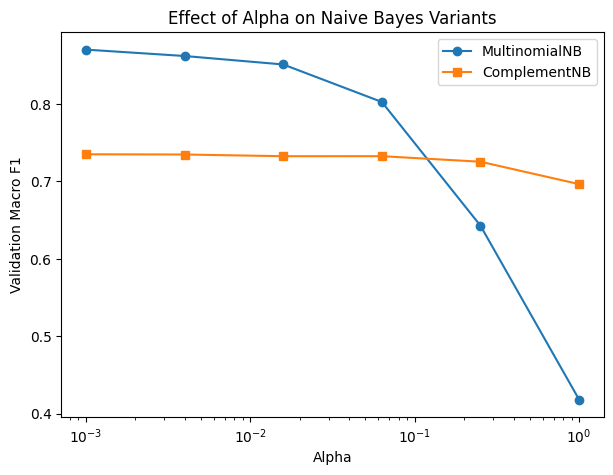

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score

# using the f1_scores_multinomial and the f1_scores_complement from erlier

# Plot both curves
plt.figure(figsize=(7,5))
plt.semilogx(alphas, f1_scores_multinomial, marker="o", label="MultinomialNB")
plt.semilogx(alphas, f1_scores_complement, marker="s", label="ComplementNB")
plt.xlabel("Alpha")
plt.ylabel("Validation Macro F1")
plt.title("Effect of Alpha on Naive Bayes Variants")
plt.legend()
plt.show()

# last step evaluat on test set with visualization

since we are using sparse matrix we will use  scipy.sparse.vstack


In [ ]:
from scipy.sparse import vstack

X_train_val_vec = vstack([X_train_vec, X_val_vec])
y_train_val = np.concatenate([y_train, y_val])

In [ ]:

nb_final = MultinomialNB(alpha=best_alpha)
nb_final.fit(X_train_val_vec, y_train_val)


,alpha,np.float64(0.001)
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
# Predict on test
y_test_pred = nb_final.predict(X_test_vec)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, f1_score

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9386161577116351
Test Macro F1: 0.8738240391719913
                precision    recall  f1-score   support

             C       0.79      0.65      0.71       155
            C#       0.99      1.00      0.99      1500
           C++       0.72      0.90      0.80       230
           CSS       0.50      0.41      0.45        39
       Clojure       0.60      0.95      0.73        19
          Dart       0.93      0.98      0.95      2302
          Diff       0.98      0.78      0.87       125
    Dockerfile       0.97      0.97      0.97        40
           ERB       0.83      0.76      0.79        75
        Elixir       0.96      0.97      0.97        80
        Erlang       1.00      1.00      1.00         7
           GAS       0.94      0.93      0.93        81
          GLSL       0.63      0.99      0.77        97
            Go       0.97      0.98      0.97      1369
Graphviz (DOT)       1.00      1.00      1.00        12
          HTML       0.96      0.88

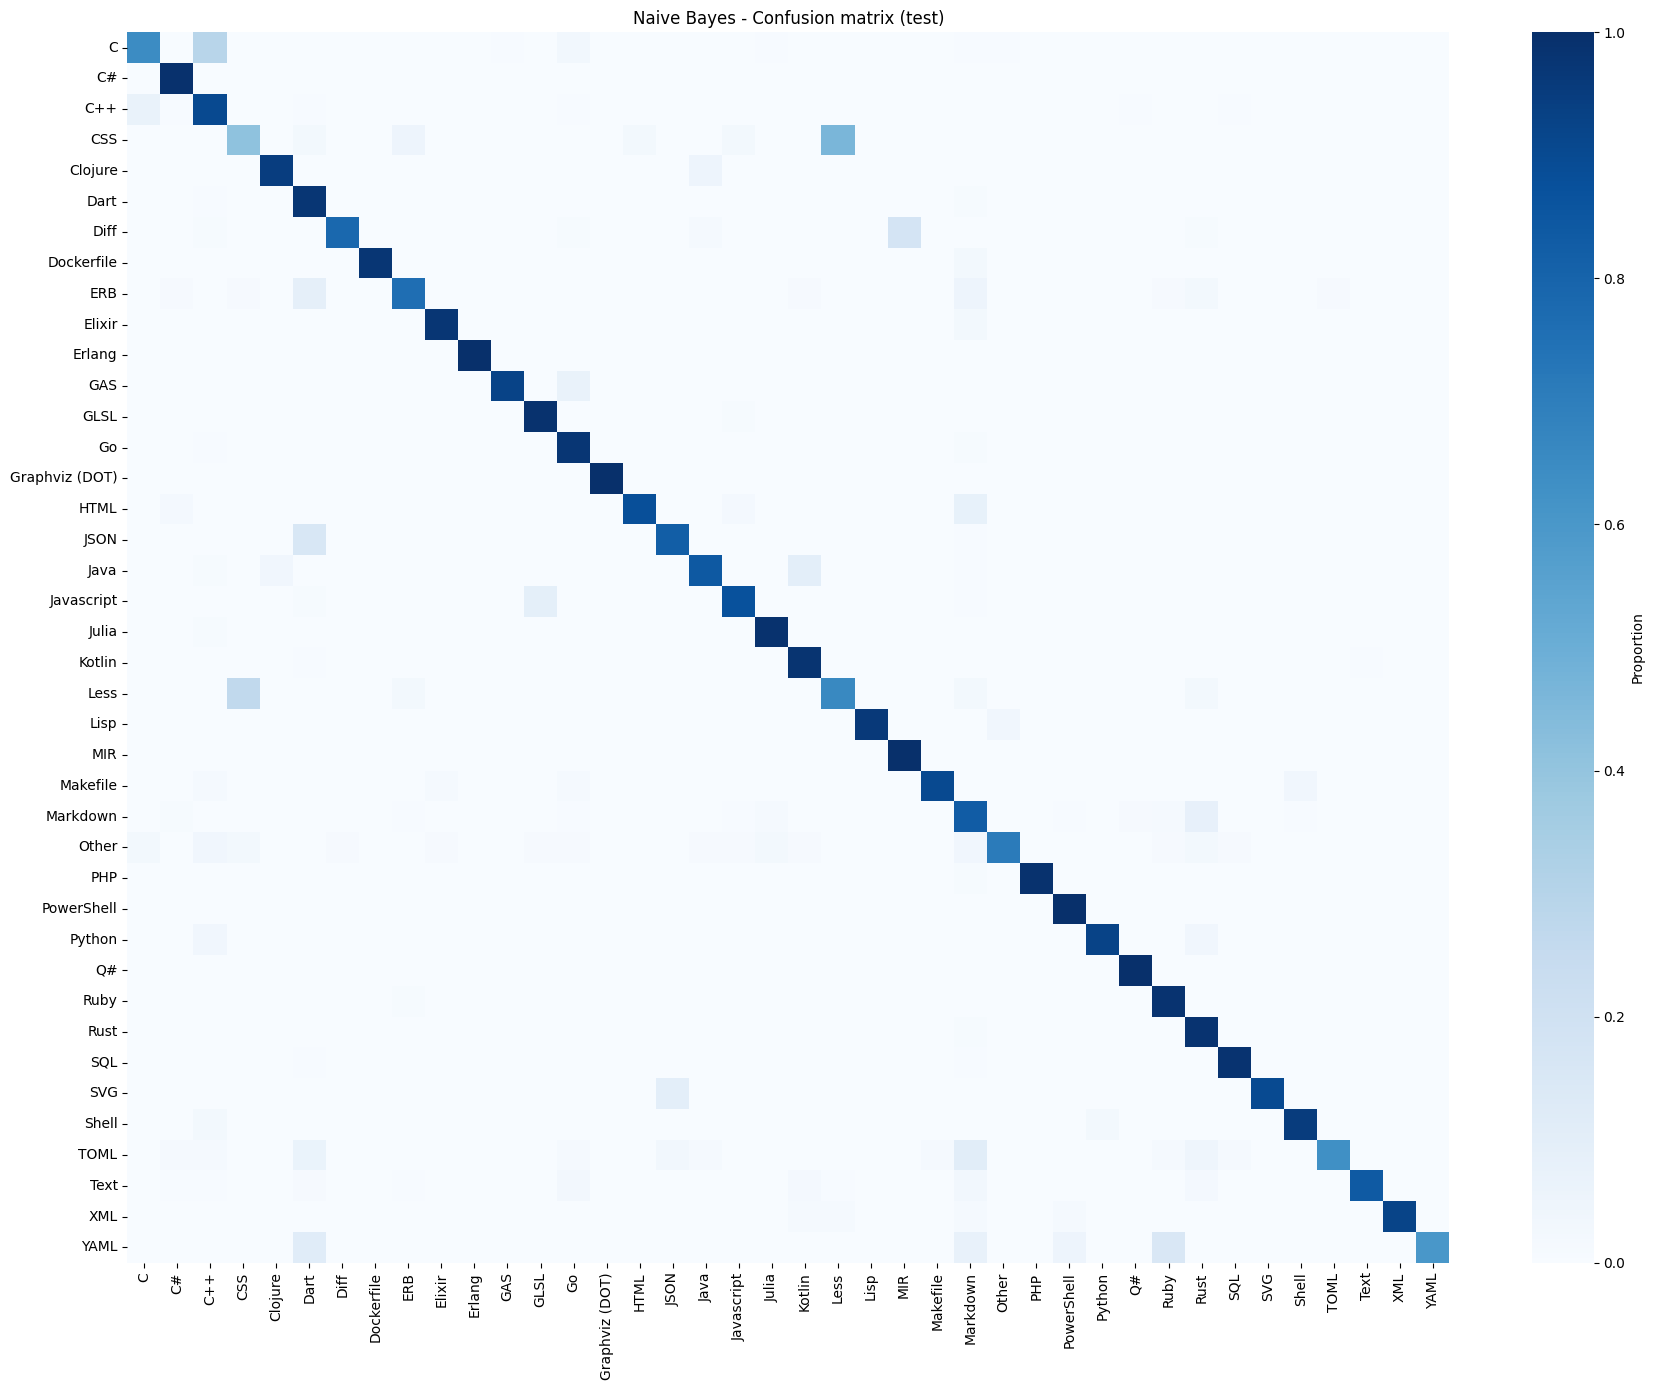

Top n-grams for C:
['int' ' in' '_t ' 'int ' 'nt ' ' i ' ' th' ' int' ' int ' 'lude ' 'ude '
 'clude']
----------------------------------------
Top n-grams for C#:
['mmary' ' summ' 'ummar' 'summa' 'summ' 'mmar' 'umma' 'mary ' ' sum'
 'mary' 'umm' 'mma']
----------------------------------------
Top n-grams for C++:
['_t ' ' in' 'int' ' th' 'lude ' 'ude ' 'clude' 'lude' 'nclud' 'inclu'
 'nclu' 'ude']
----------------------------------------
Top n-grams for CSS:
['color' 'olor' 'colo' 'lor' 'olo' 'px ' 'olor ' 'lor ' 'col' ' colo'
 'font' 'fon']
----------------------------------------
Top n-grams for Clojure:
['ojure' 'cloj' 'cloju' 'lojur' 'loju' 'ojur' 'jure' 'jur' 'loj' 'oju'
 ' cloj' ' th']
----------------------------------------
Top n-grams for Dart:
[' th' 'se ' 'the' ' the' ' the ' 'the ' 'he ' 'le ' 'e f' 'rt ' ' fi'
 'ect']
----------------------------------------
Top n-grams for Diff:
[' p_' 'sf_' 'p_1' 'craft' 'craf' 'minec' 'ecraf' 'necra' 'raft' 'ecra'
 'netmi' 'inecr']
---

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix

cm = confusion_matrix(y_test,y_test_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(18,14))
sns.heatmap(cm_norm, annot=False, cmap="Blues",
            xticklabels=nb_final.classes_,
            yticklabels=nb_final.classes_,
            cbar_kws={'label': 'Proportion'})


plt.title("Naive Bayes - Confusion matrix (test)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("C:/Users/slima/NLP/NLP_projct_1/visualization/figuer_nb/cm_nb_language.png", dpi=300, bbox_inches="tight")

plt.show()

# Top character n-grams per class (explainability)
import numpy as np

def top_char_ngrams(vectorizer, clf, class_name, k=15):
    class_idx = list(clf.classes_).index(class_name)
    log_probs = clf.feature_log_prob_[class_idx]
    top_idx = np.argsort(log_probs)[-k:]
    features = vectorizer.get_feature_names_out()[top_idx]
    return features[::-1]

for cls in nb_final.classes_[:10]:  # show first 5 classes
    print(f"Top n-grams for {cls}:")
    print(top_char_ngrams(tfidf, nb_final, cls, k=12))
    print("-" * 40)



['Dart' 'Dart' 'Dart' 'Dart' 'Dart' 'Dart' 'Dart']


In [ ]:
import joblib

# Load the model
joblib.dump(nb_final,'C:/Users/slima/NLP/NLP_projct_1/models/NaiveBaise_model/nb_modelV2.pkl')

['C:/Users/slima/NLP/NLP_projct_1/models/NaiveBaise_model/nb_modelV2.pkl']

In [ ]:
joblib.dump(tfidf,'C:/Users/slima/NLP/NLP_projct_1/models/NaiveBaise_model/tfidfV2.pkl')

['C:/Users/slima/NLP/NLP_projct_1/models/NaiveBaise_model/tfidfV2.pkl']